## Deep Learning with PyTorch : Neural Style Transfer

## Step 1 : Setup the Enviroment

In [1]:
!pip install torch torchvision

In [2]:
!git clone https://github.com/Shifu34/Deep-Learning-with-PyTorch-Neural-Style-Transfer.git

Cloning into 'Deep-Learning-with-PyTorch-Neural-Style-Transfer'...
remote: Enumerating objects: 44, done.
remote: Counting objects: 100% (44/44), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 44 (delta 9), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (44/44), 4.62 MiB | 21.20 MiB/s, done.
Resolving deltas: 100% (9/9), done.


## Step 2 : Loading VGG Pretrained Model

In [3]:
import torch
from torchvision import models

vgg=models.vgg19(pretrained=True)
print(vgg)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth
100%|██████████| 548M/548M [00:08<00:00, 70.3MB/s]


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [4]:
vgg=vgg.features
print(vgg)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo

In [5]:
for parameters in vgg.parameters():
  parameters.requires_grad_(False) # Freeze the model so that no update on weight or bias occur


In [6]:
# Check If you have gpu or cpu
device=torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [7]:
# Moving model to the gpu
vgg.to(device)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo

## Step 3 : Preprocess image

In [8]:
from PIL import Image
from torchvision import transforms as T

#It will be used to resize the image if it exceed the max size
def preprocess(img_path,max_size=500):
  image=Image.open(img_path).convert("RGB")

  if max(image.size)>max_size:
    size=max_size
  else:
    size=max(image.size)
  #img_transform is resizing the image to the size and converting it to tensor and normalizing it
  img_transforms= T.Compose([
      T.Resize(size),
      T.ToTensor(), #(3,244,244) -> (244,244,3)
      T.Normalize(mean=[0.485,0.456,0.406],
                  std=[0.229,0.224,0.225])
  ])
  #Applying img_transforms on the image
  image=img_transforms(image)
  # in order to send the image to the model we need to add this extra dimension
  #(3,224,224)-> (1,3,224,224) this means that it add extra dimension/batch size to the image
  image= image.unsqueeze(0)

  return image


In [9]:
content_p=preprocess('/content/Deep-Learning-with-PyTorch-Neural-Style-Transfer/content images/content3.jpg')
style_p= preprocess('/content/Deep-Learning-with-PyTorch-Neural-Style-Transfer/style images/style4.jpg')


#moving both to the gpu
content_p=content_p.to(device)
style_p=style_p.to(device)

# Printing Shape of both images
print("Content Shape: ", content_p.shape)
print("Style Shape: ", style_p.shape)

Content Shape:  torch.Size([1, 3, 500, 996])
Style Shape:  torch.Size([1, 3, 500, 666])


## Step 4 : Deprocess image

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def deprocess(tensor):
  image=tensor.to('cpu').clone()
  image=image.numpy()
  # Do the opposite of unsqueeze(0)
  image=image.squeeze(0) #(1,3,244,244)-> #(3,244,244)
  # we do this because the function ToTensor basically changes the dimensions of image from (3,244,244) -> (244,244,3)
  # So we have to reverse it
  image=image.transpose(1,2,0) #(244,244,3) -> (3,244,244)
  # multiplying with standard deviation and adding the mean
  image=image * np.array([0.229,0.224,0.225]) + np.array([0.485,0.456,0.406])
  # we use this clip function to set a values of tensor to be in a specific range
  # we it does is that the values of tensor less than zero will be set to zero and values greater than one will be set to one
  image=image.clip(0,1)
  return image

In [11]:
content_d=deprocess(content_p)
style_d=deprocess(style_p)

# Printing Shape of both images
print("Content Shape: ", content_d.shape)
print("Style Shape: ", style_d.shape)

Content Shape:  (500, 996, 3)
Style Shape:  (500, 666, 3)


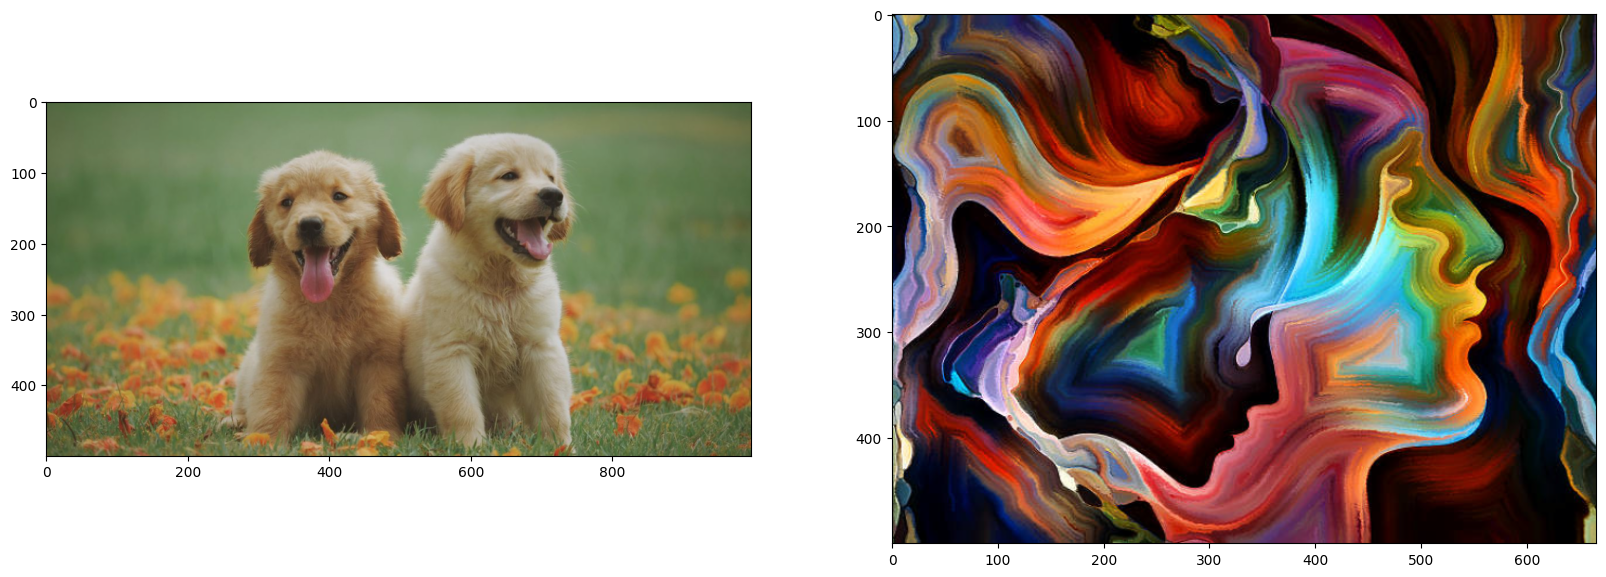

In [12]:
#Ploting the content image and the style image after deprocessing
fig, (ax1,ax2) = plt.subplots(1,2,figsize = (20,10))

ax1.imshow(content_d)
ax2.imshow(style_d)

## Step 5 : Get content,style features and create gram matrix

In [13]:
def get_features(image,model):
  # Mapping layers name according to the paper
  layers={
      '0':'conv1_1',
      '5':'conv2_1',
      '10': 'conv3_1',
      '19': 'conv4_1',
      '21': 'conv4_2', #content_feature
      '28': 'conv5_1' # style_featues
  }

  x=image

  Features={}
  #model._modules.items() will load layers from vgg19 one by one with the name
  for name,layer in model._modules.items():

    x=layer(x)

    #Here we are storing the same name layers as the one in the layers dict's output in this features dict with layers name
    if name in layers:
      Features[layers[name]]=x

  return Features


In [14]:
content_f=get_features(content_p,vgg)
style_f=get_features(style_p,vgg)

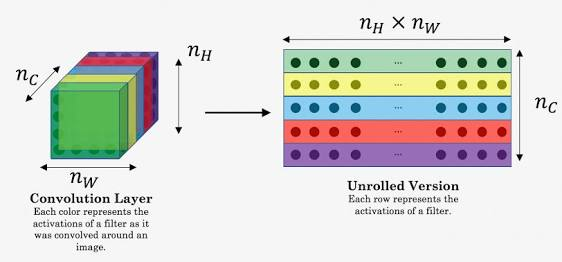

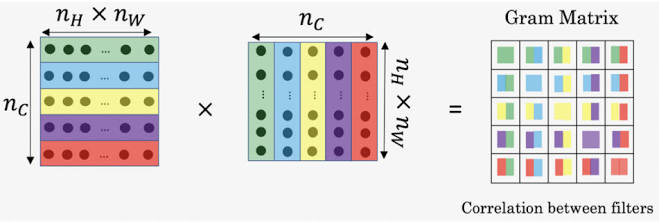

In [15]:
def gram_matrix(tensor):
  # here we get the batch size, channels, height , width
  b,c,h,w=tensor.size()
  # Here we change the shape of tensor to (c,h*w)
  tensor=tensor.view(c,h*w)
  #torch.mm is the matrix multiplication used to multiply two torch matrices
  # tensor.t() is used to transpose the tensor
  gram=torch.mm(tensor,tensor.t())
  return gram

In [16]:
style_grams={layer : gram_matrix(style_f[layer]) for layer in style_f}

## Step 6 : Creating Style and Content loss function

In [17]:
def content_loss(target_conv4_2, content_conv4_2):
    """
    Calculate content loss between target and content features.

    Parameters:
        target_conv4_2 (torch.Tensor): Features from the target image at a specific layer.
        content_conv4_2 (torch.Tensor): Features from the content image at the same layer.

    Returns:
        torch.Tensor: Content loss.
    """
    # Calculate the mean squared difference between target and content features
    loss = torch.mean((target_conv4_2 - content_conv4_2) ** 2)
    # Return the content loss
    return loss


In [18]:
style_weights= {
    'conv1_1' : 1.0,
    'conv2_1' : 0.75,
    'conv3_1' : 0.2,
    'conv4_1' : 0.2,
    'conv5_1' : 0.2
}

In [19]:
def style_loss(style_weights, target_features, style_grams):
    """
    Calculate style loss between target and style images.

    Parameters:
        style_weights (dict): Weights for each layer in the style image.
        target_features (dict): Features from the target image at each layer.
        style_grams (dict): Gram matrices computed from features of the style image.

    Returns:
        torch.Tensor: Total style loss.
    """
    # Initialize loss
    loss = 0
    # Iterate through each layer in style_weights
    for layer in style_weights:
        # Extract features and calculate Gram matrix for the target image at the current layer
        target_f = target_features[layer]
        target_gram = gram_matrix(target_f)
        # Retrieve Gram matrix for the style image at the current layer
        style_gram = style_grams[layer]
        # Get dimensions of the target feature map
        b, c, h, w = target_f.shape
        # Calculate style loss for the current layer
        layer_loss = style_weights[layer] * torch.mean((target_gram - style_gram) ** 2)
        # Normalize the loss by the number of elements in the feature map
        loss += layer_loss / (c * h * w)
    return loss


In [20]:
# Clone the content image tensor, enable gradient tracking, and move it to the GPU
target = content_p.clone().requires_grad_(True).to(device)
# Extract features from the target image using the VGG model and our get_features function
target_f = get_features(target, vgg)
# Display content loss between the features of the target and content images at 'conv4_2' layer
content_loss_value = content_loss(target_f['conv4_2'], content_f['conv4_2'])
print("Content Loss: ", content_loss_value)
# Display style loss between the target image and style image using the specified style weights and Gram matrices
style_loss_value = style_loss(style_weights, target_f, style_grams)
print("Style Loss: ", style_loss_value)


Content Loss:  tensor(0., device='cuda:0', grad_fn=<MeanBackward0>)
Style Loss:  tensor(355.1632, device='cuda:0', grad_fn=<AddBackward0>)


## Step 7 : Training loop

In [21]:
from torch import optim
# We are passing target in the optim function because we want to update the pixel value of the target when loss get minimized
optimizer = optim.Adam([target],lr = 0.003)
alpha = 1
beta =1e5

epochs = 3000
show_every = 500

In [22]:
#Calculating the total loss
def total_loss(c_loss,s_loss,alpha,beta):
  loss = alpha * c_loss + beta * s_loss
  return loss

In [23]:
# Initialize an empty list to store the results
results = []
# Loop through the specified number of epochs
for i in range(epochs):
    # Extract features from the target image using the VGG model
    target_f = get_features(target, vgg)
    # Calculate content loss between the features of the target and content images at 'conv4_2' layer
    c_loss = content_loss(target_f['conv4_2'], content_f['conv4_2'])
    # Calculate style loss between the target image and style image using the specified style weights and Gram matrices
    s_loss = style_loss(style_weights, target_f, style_grams)
    # Calculate the total loss as a combination of content and style losses
    t_loss = total_loss(c_loss, s_loss, alpha, beta)
    # Reset optimizer gradients, perform backpropagation, and update the parameters
    optimizer.zero_grad()
    t_loss.backward()
    optimizer.step()
    # Print total loss at specified intervals
    if i % show_every == 0:
        print("Total loss at epoch {} : {}".format(i, t_loss))
        # Append the deprocessed target image to the results list
        results.append(deprocess(target.detach()))


Total loss at epoch 0 : 35516320.0
Total loss at epoch 500 : 2954190.25
Total loss at epoch 1000 : 1240985.125
Total loss at epoch 1500 : 768196.8125
Total loss at epoch 2000 : 560865.0625
Total loss at epoch 2500 : 445582.96875


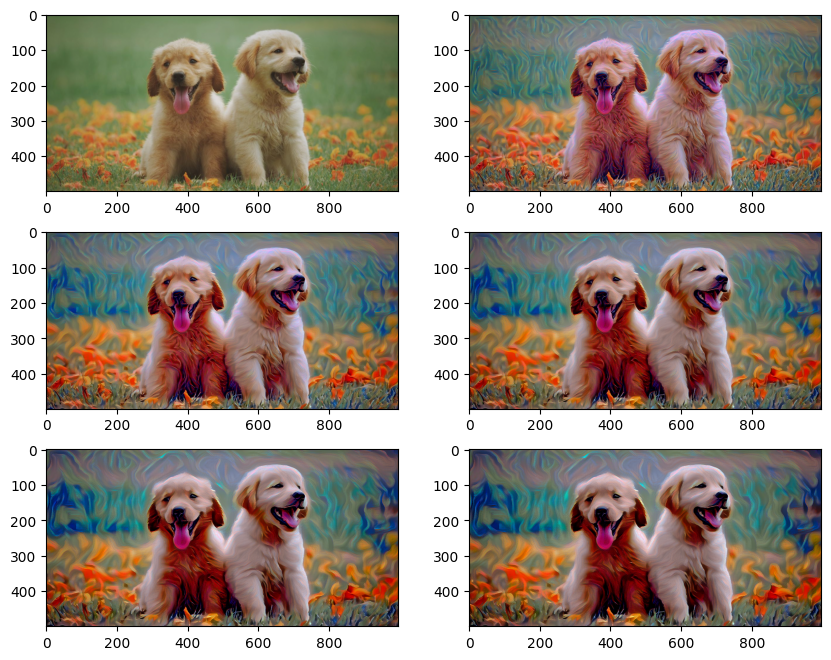

In [24]:
# Set the size of the figure
plt.figure(figsize=(10, 8))
# Loop through the results and plot each deprocessed target image
for i in range(len(results)):
    # Create subplots with 3 rows and 2 columns, indexing starts from 1
    plt.subplot(3, 2, i + 1)
    # Display the image in the current subplot
    plt.imshow(results[i])
# Show the entire plot
plt.show()

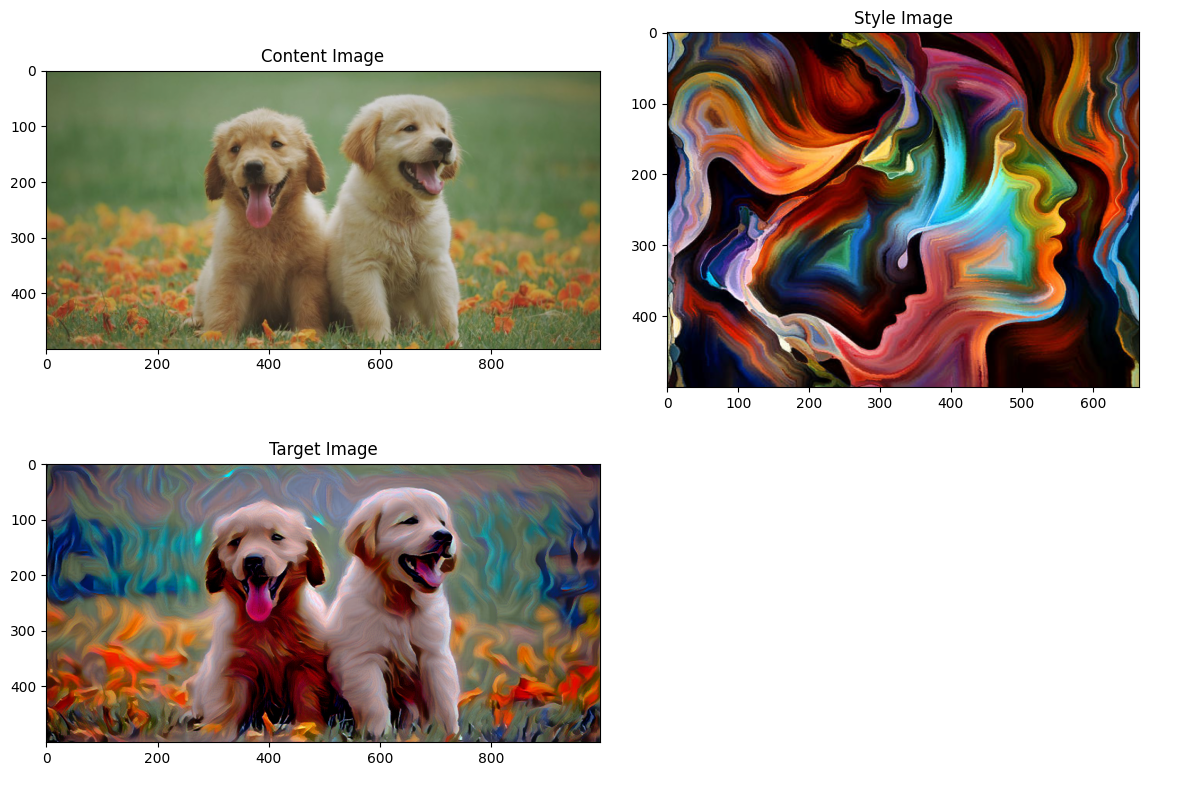

In [30]:
# Obtain deprocessed versions of the target and content images
target_copy = deprocess(target.detach())
content_copy = deprocess(content_p)
# Create a figure with 2 rows and 2 columns for side-by-side comparison
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
# Display the deprocessed target image in the first subplot of the first row
axs[0, 0].imshow(content_copy)
axs[0, 0].set_title('Content Image')
# Display the deprocessed content image in the second subplot of the first row
axs[0, 1].imshow(style_d)
axs[0, 1].set_title('Style Image')
# Display the style image in the first subplot of the second row
axs[1, 0].imshow(target_copy)
axs[1, 0].set_title('Target Image')
# Hide the empty subplot in the second position of the second row
axs[1, 1].axis('off')
# Adjust layout for better spacing
plt.tight_layout()
# Show the entire figure
plt.show()
